# K-means implementation

<img src="https://miro.medium.com/v2/resize:fit:1280/format:webp/1*rwYaxuY-jeiVXH0fyqC_oA.gif" width="600">


**Understanding K-means Clustering**

K-means clustering is a technique used to organize data into groups based on their similarity. The algorithm works by first randomly picking some central points called centroids and each data point is then assigned to the closest centroid forming a cluster. After all the points are assigned to a cluster the centroids are updated by finding the average position of the points in each cluster. This process repeats until the centroids stop changing forming clusters. The goal of clustering is to divide the data points into clusters so that similar data points belong to same group.

**How k-means clustering works?**

We are given a data set of items with certain features and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm. ‚ÄòK‚Äô in the name of the algorithm represents the number of groups/clusters we want to classify our items into.

The algorithm will categorize the items into k groups or clusters of similarity. To calculate that similarity, we will use the Euclidean distance as a measurement. The algorithm works as follows:  

- First, we randomly initialize k points, called means or cluster centroids.
- We categorize each item to its closest mean, and we update the mean‚Äôs coordinates, which are the averages of the items categorized in that cluster so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

We will explore three measurements:

`Central Tendency`
* mean_center: calculate the mean center of the unmarked point pattern.
* weighted_mean_center: calculate the weighted mean center of the marked point pattern.

`Dispersion and Orientation`
* std_distance: calculate the standard distance

All of the above functions operate on a series of coordinate pairs. That is, the data type of the first argument should be  (ùëõ,2) array_like. In case that you have a point pattern (PointPattern instance), you need to pass its attribute "points" instead of itself to these functions.

In [3]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
pp = PointPattern(points) #create a point pattern "pp" from list
pp.points 

x      y
0   66.22  32.54
1   22.52  22.39
2   31.01  81.21
3    9.47  31.02
4   30.78  60.10
5   75.21  58.93
6   79.26   7.68
7    8.23  39.93
8   98.73  77.17
9   89.78  42.53
10  65.19  92.08
11  54.46   8.48

We can use PointPattern class method plot to visualize pp.

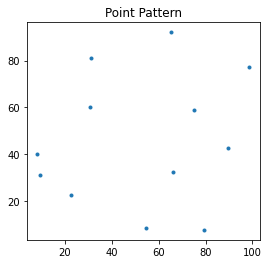

In [4]:
pp.plot()

### Central Tendency

Central Tendency concerns about the center point of the two-dimensional distribution. It is similar to the first moment of a one-dimensional distribution. There are several ways to measure central tendency, each having pros and cons. We need to carefully select the appropriate measure according to our objective and data status.

<b>Mean Center</b> (ùë•<sub>ùëöùëê</sub>, ùë¶<sub>ùëöùëê</sub>)

$$
  x_{mc} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
$$
  y_{mc} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

In [8]:
mc = mean_center(pp.points)
mc

array([52.57166667, 46.17166667])

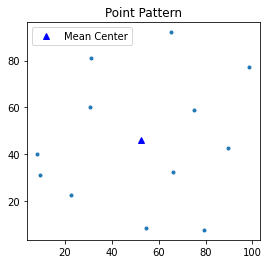

In [9]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)

<b>Weighted Mean Center</b>  (ùë•<sub>ùë§ùëöùëê</sub>, ùë¶<sub>ùë§ùëöùëê</sub>)

$$
x_{wmc} = \sum_{i=1}^{n} \frac{w_i x_i}{\sum_{i=1}^{n} w_i}
$$

$$
y_{wmc} = \sum_{i=1}^{n} \frac{w_i y_i}{\sum_{i=1}^{n} w_i}
$$

Weighted mean center is meant for marked point patterns. Aside from the first argument which is a seris of  (ùë•,ùë¶) coordinates in weighted_mean_center function, we need to specify its second argument which is the weight for each event point.

In [10]:
weights = np.arange(12)
weights

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
wmc = weighted_mean_center(pp.points, weights)
wmc

array([60.51681818, 47.76848485])

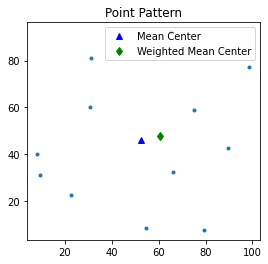

In [12]:
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Mean Center') 
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend(numpoints=1)

### Dispersion and Orientation

<b>Standard Distance & Standard Distance Circle</b>

$$
SD = \sqrt{\frac{\sum_{i=1}^{n} (x_i - x_m)^2}{n} + \frac{\sum_{i=1}^{n} (y_i - y_m)^2}{n}}
$$

The Standard distance is closely related to the usual definition of the standard deviation of a data set, and it provides a measure of how dispersed the events are around their mean center (ùë•ùëö,ùë¶ùëö). Taken together, these measurements can be used to plot a summary circle (standard distance circle) for the point pattern, centered at  (ùë•ùëö,ùë¶ùëö) with radius ùëÜùê∑, as shown below.

In [13]:
stdd = std_distance(pp.points)
stdd

40.14980648908671

Plot mean center as well as the standard distance circle.

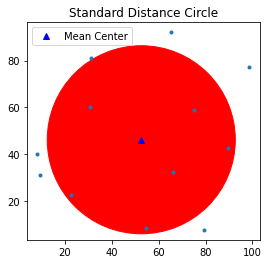

In [14]:
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

From the above figure, we can observe that there are five points outside the standard distance circle which are potential outliers.

<b>Standard Deviational Ellipse</b>

Compared with standard distance circle which measures dispersion using a single parameter ùëÜùê∑, standard deviational ellipse measures dispersion and trend in two dimensions through angle of rotation ùúÉ, dispersion along major axis S<sub>ùë•</sub> and dispersion along minor axis S<sub>ùë¶</sub>:

Major axis defines the direction of maximum spread in the distribution. S<sub>ùë•</sub> is the semi-major axis (half the length of the major axis):

$$
s_x = \sqrt{\frac{2 \left( \sum_{i=1}^{n} (x_i - \bar{x}) \cos(\theta) - \sum_{i=1}^{n} (y_i - \bar{y}) \sin(\theta) \right)^2}{n - 2}}
$$

Minor axis defines the direction of minimum spread and is orthogonal to major axis. S<sub>ùë¶</sub> is the semi-minor axis (half the length of the minor axis):

$$
s_y = \sqrt{\frac{2 \left( \sum_{i=1}^{n} (x_i - \bar{x}) \sin(\theta) - \sum_{i=1}^{n} (y_i - \bar{y}) \cos(\theta) \right)^2}{n - 2}}
$$

The ellipse is rotated clockwise through an angle ùúÉ:

$$
\theta = \arctan \left\{ 
\left( \sum_{i} (x_i - \bar{x})^2 - \sum_{i} (y_i - \bar{y})^2 \right) 
+ \frac{\left[ \left( \sum_{i} (x_i - \bar{x})^2 - \sum_{i} (y_i - \bar{y})^2 \right)^2 
+ 4 \left( \sum_{i} (x_i - \bar{x})(y_i - \bar{y}) \right)^2 \right]^{\frac{1}{2}}}{2 \sum_{i} (x_i - \bar{x})(y_i - \bar{y})} \right\}
$$


In [15]:
sx, sy, theta = ellipse(pp.points)
sx, sy, theta

(39.62386788646298, 42.753818949026815, 1.1039268428650906)

In [16]:
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
theta_degree

63.250348987371304

The Standard Deviational Ellipse for the point pattern is rotated clockwise by 63.25 degrees.

<Figure size 432x288 with 0 Axes>

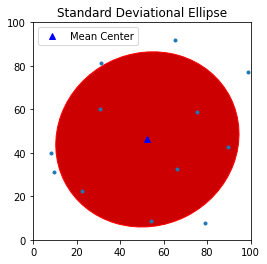

In [17]:
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree) #angle is rotation in degrees (anti-clockwise)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)
show()